In [2]:
import spectral.io.envi as envi
from proj.tasks import send_matrix_to_queue_task, read_image_spectral, clf_RF_1, read_col_data_from_file
import numpy as np
import sqlite3
from concurrent.futures import ThreadPoolExecutor, as_completed
import os
import json
from datetime import datetime
import time
import matplotlib.pyplot as plt

In [3]:
img = read_image_spectral()

In [4]:
img

	Data Source:   './../data/spectral_image/hyper_20220913_3cm.img'
	# Rows:           6478
	# Samples:        5287
	# Bands:           122
	Interleave:        BSQ
	Quantization:   8 bits
	Data format:     uint8

In [5]:
num_row, num_col, num_band = img.shape

In [6]:
nitos = np.zeros((num_row, num_col))

In [7]:
for col in range(num_col):
    if col % 100 == 0:
        print(col)
    file_path = f"./data/img_col_data/img_{col}.npz"
    bands = read_col_data_from_file(file_path)
    nitos[:, col] = clf_RF_1.predict(bands)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200


In [8]:
nitos.shape

(6478, 5287)

In [9]:
def draw(result, file_output, color_map):
    # Assuming 'assigned_values' is your array with assigned values for each pixel
    # Replace this with your actual data
    assigned_values = np.random.randint(0, 255, size=(100, 100))

    # Define a colormap (you can choose any colormap from matplotlib)
    cmap = color_map

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Display the image with the assigned colors
    im = ax.imshow(result, cmap=cmap)

    # Add a colorbar to the right of the plot
    cbar = fig.colorbar(im, ax=ax)

    # Show the plot
    # plt.gcf().savefig(file_output)
    plt.show()
    

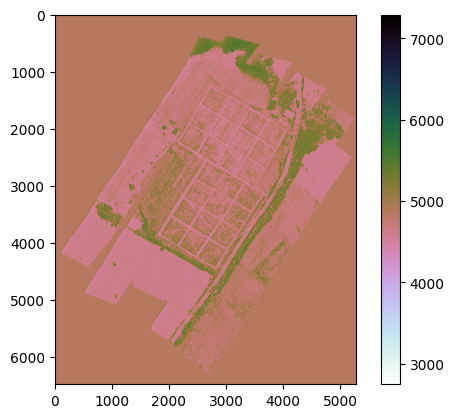

In [10]:
draw(nitos, "./output_image/nito/nito1.png", "cubehelix_r")

In [11]:
from matplotlib import colormaps
import time 
list_cmap = list(colormaps)

In [12]:
# for cmap in list_cmap:
#     print(cmap)
#     draw(nitos, "./output_image/nito/nito1.png", cmap)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define the colors and their positions along the colormap
colors = [(0, 'blue'),     # Start color (position 0)
          (0.5, 'green'),  # Middle color (position 0.5)
          (0.51, 'yellow'),# Custom color for the range 5000-6000 (position 0.51)
          (1, 'red')] 

In [14]:
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

In [15]:
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

In [16]:
viridis = mpl.colormaps['viridis']

In [17]:
viridis(0.56)

(0.120081, 0.622161, 0.534946, 1.0)

In [18]:
np.linspace(0, 1, 8)

array([0.        , 0.14285714, 0.28571429, 0.42857143, 0.57142857,
       0.71428571, 0.85714286, 1.        ])

In [19]:
def plot_examples(colormaps):
    """
    Helper function to plot data with associated colormap.
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3),
                            layout='constrained', squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()

In [20]:
cmap = ListedColormap(["darkorange", "gold", "lawngreen", "0"])

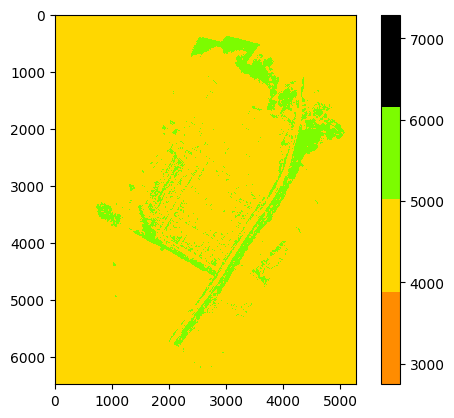

In [21]:
draw(nitos, "./", cmap)

In [22]:
viridis = mpl.colormaps['viridis'].resampled(256)


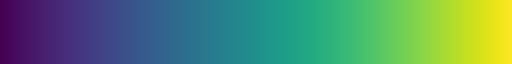

In [23]:
viridis

In [24]:
newcolors = viridis(np.linspace(0, 1, 256))

In [25]:
newcolors.shape

(256, 4)

In [26]:
newcolors

array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.26851 , 0.009605, 0.335427, 1.      ],
       [0.269944, 0.014625, 0.341379, 1.      ],
       ...,
       [0.974417, 0.90359 , 0.130215, 1.      ],
       [0.983868, 0.904867, 0.136897, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])

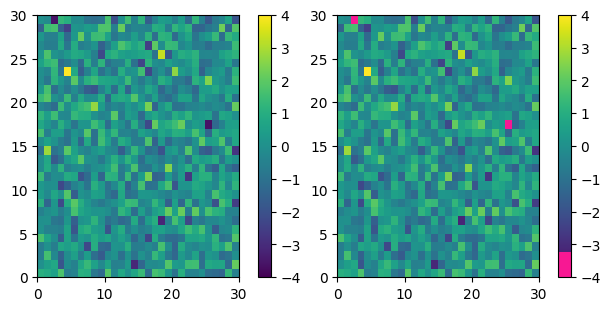

In [27]:

pink = np.array([248/256, 24/256, 148/256, 1])
newcolors[:25, :] = pink
newcmp = ListedColormap(newcolors)

plot_examples([viridis, newcmp])

In [28]:
np.max(nitos)

7290.494846191406

In [29]:
np.min(nitos)

2749.4663415527343

In [40]:
number_color = 8000

In [41]:
tab20c = mpl.colormaps['tab20c'].resampled(number_color)

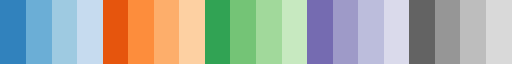

In [42]:
tab20c

In [79]:
newcolors_tab20c = tab20c(np.linspace(0, 1, number_color))

In [80]:
newcolors_tab20c[3200:3600, :] = np.array([130, 203, 186, 0.8])

In [81]:
newcolors_tab20c.shape

(8000, 4)

In [82]:
newcmp_tab20c = ListedColormap(newcolors_tab20c)

In [83]:
draw(nitos, "", newcmp_tab20c)

: 